# Economic Trends and Human Well-being: A Comparative Analysis of GDP and Life Expectancy

## Introduction

Over the course of the past few centuries, technological and medical advancements have helped increase the life expectancy of humans. However, as of now, the average life expectancy of humans varies depending on what country you live in.

In this project, we will investigate a dataset containing information about the average life expectancy in six different countries. We will specifically look at how a country's economic success might impact the life expectancy in that area.

#### Questions I'm aimimg to answer throughout the project:
+ What is the distribution of GDP and Life Expectancy in the data?
+ How does the distribution of life expectancy vary across different GDP levels?
+ How do the mean GDP and mean life expectancy vary across different countries?
+ How does life expectancy and GDP vary across different countries and years?
+ Has GDP increased over time in the six nations?
+ Has life expectancy increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the strength and direction of the correlation between GDP and life expectancy for each country? Are there significant differences in the correlation coefficient among different countries?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Step 1. Import Python Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.stats import pearsonr
%matplotlib inline

## Step 2. Data Loading and Inspection

In [3]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv("all_data.csv")

In [4]:
# nspect the first 5 rows to understand the structure of the data
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [5]:
# Inspect the size of the data 
df.shape

(96, 4)

In [6]:
# Get information about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [7]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


The third column's name is a little difficult to wrangle for coding. I used the rename function to change the column name to 'Life Expectancy'.

In [8]:
# Rename the column
df = df.rename({"Life expectancy at birth (years)":"Life Expectancy"}, axis = "columns")
df.head()

,Country,Year,Life Expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Step 3. Data Exploration and Visualization

First of all I want to explore which country and years are represented in the data.

In [9]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [10]:
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

### What is the distribution of GDP and Life Expectancy in the data?

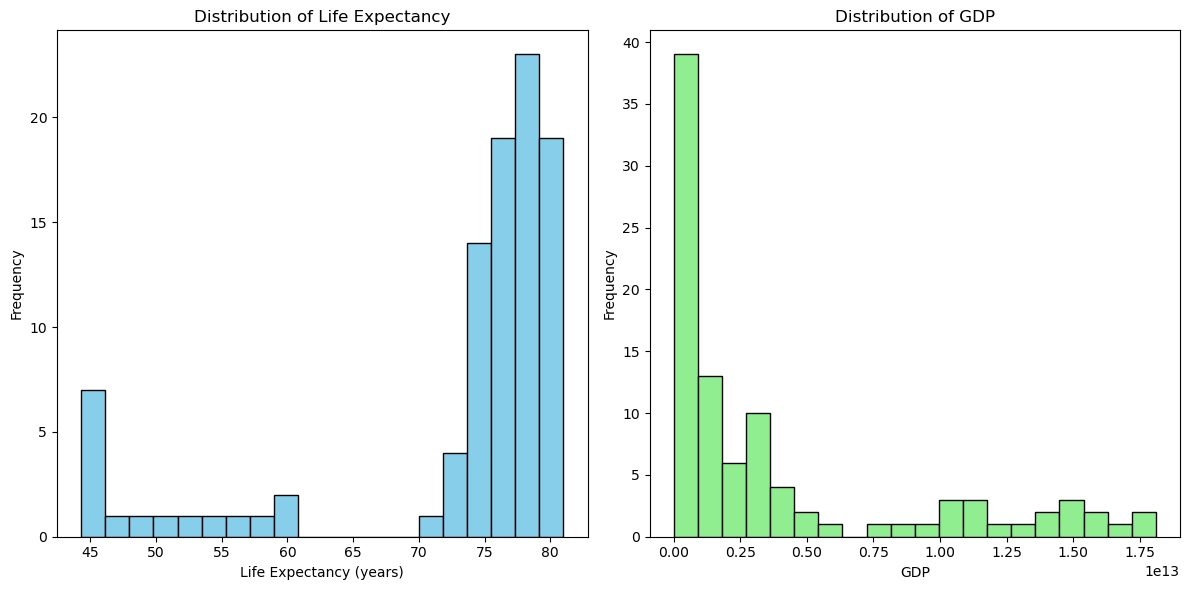

In [11]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot distribution of Life Expectancy
axs[0].hist(df['Life Expectancy'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Life Expectancy')
axs[0].set_xlabel('Life Expectancy (years)')
axs[0].set_ylabel('Frequency')

# Plot distribution of GDP
axs[1].hist(df['GDP'], bins=20, color='lightgreen', edgecolor='black')
axs[1].set_title('Distribution of GDP')
axs[1].set_xlabel('GDP')
axs[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


#### Analysis
- The distribution of `GDP` in the data is very right skewed where most of the values are on the left-hand side. This type of distribution could be described as a power law distribution. The most frequent GDP indicator is located within 1.0T of U.S. Dollars.
- The distribution of `Life Expectancy` in the data is very left skewed where most of the values are on the right-hand side. This is almost the opposite of what was observed in the `GDP` column. 


### How does the distribution of life expectancy vary across different GDP levels?

Firstly, I aim to calculate the quartiles of life expectancy, which will indicate the range within which the majority of the data points are likely to fall.

Life Expectancy Quartiles: [74.475 76.75  78.9  ]


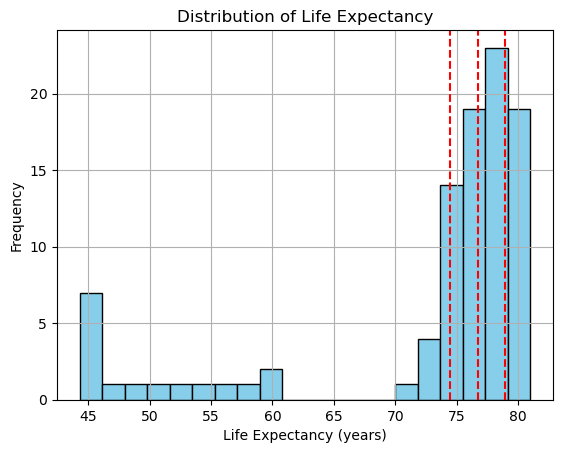

<Figure size 640x480 with 0 Axes>

In [12]:
# Extract life expectancy and GDP data
life_expectancy = df['Life Expectancy']
gdp = df['GDP']

# Calculate quartiles for life expectancy
life_expectancy_quartiles = np.quantile(life_expectancy, [0.25, 0.5, 0.75])
print("Life Expectancy Quartiles:", life_expectancy_quartiles)

# Plot histogram for life expectancy
plt.hist(life_expectancy, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')
plt.grid(True)
# Add vertical lines to indicate quartiles
for quartile in life_expectancy_quartiles:
    plt.axvline(x=quartile, color='red', linestyle='--')
plt.show()
plt.clf()

Subsequently, I aim to partition the data into two groups based on the median GDP: Low and High GDP. This division will enable us to examine how life expectancy is distributed among these groups and assess any disparities or patterns that may emerge.

Median GDP: 1280220000000.0
Low GDP Life Expectancy Quartiles: [56.175 75.6   77.925]
High GDP Life Expectancy Quartiles: [75.55  78.05  79.125]


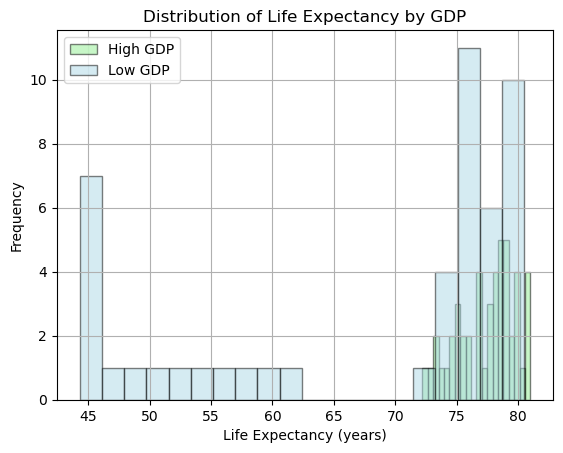

In [21]:
# Calculate median GDP
median_gdp = np.median(gdp)
print("Median GDP:", median_gdp)

# Split data into low and high GDP groups
low_gdp = df[df['GDP'] <= median_gdp]
high_gdp = df[df['GDP'] > median_gdp]

# Calculate quartiles for life expectancy in low and high GDP groups
low_gdp_quartiles = np.quantile(low_gdp['Life Expectancy'], [0.25, 0.5, 0.75])
print("Low GDP Life Expectancy Quartiles:", low_gdp_quartiles)
high_gdp_quartiles = np.quantile(high_gdp['Life Expectancy'], [0.25, 0.5, 0.75])
print("High GDP Life Expectancy Quartiles:", high_gdp_quartiles)

# Plot histogram comparing life expectancy in high and low GDP groups
plt.hist(high_gdp["Life Expectancy"], bins = 20, alpha=0.5, label="High GDP", color='lightgreen', edgecolor='black')
plt.hist(low_gdp["Life Expectancy"], bins = 20, alpha=0.5, label="Low GDP", color='lightblue', edgecolor='black')
plt.title('Distribution of Life Expectancy by GDP')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


#### Analysis
- A interquartile range (IQR) of the `Life Expectancy` is between `74.5` years and `78.9` years.
- The range between the first and third quartiles (interquartile range) is narrower in the `high GDP` group (between `75.5` years and `79.1` years), indicating less variability in life expectancy compared to the `low GDP` group (between `56.1` years and `77.9` years).
- `Life Expectancy`of less than `63` years is belonging only to the group of low GDP.

### How do the mean GDP and mean life expectancy vary across different countries?

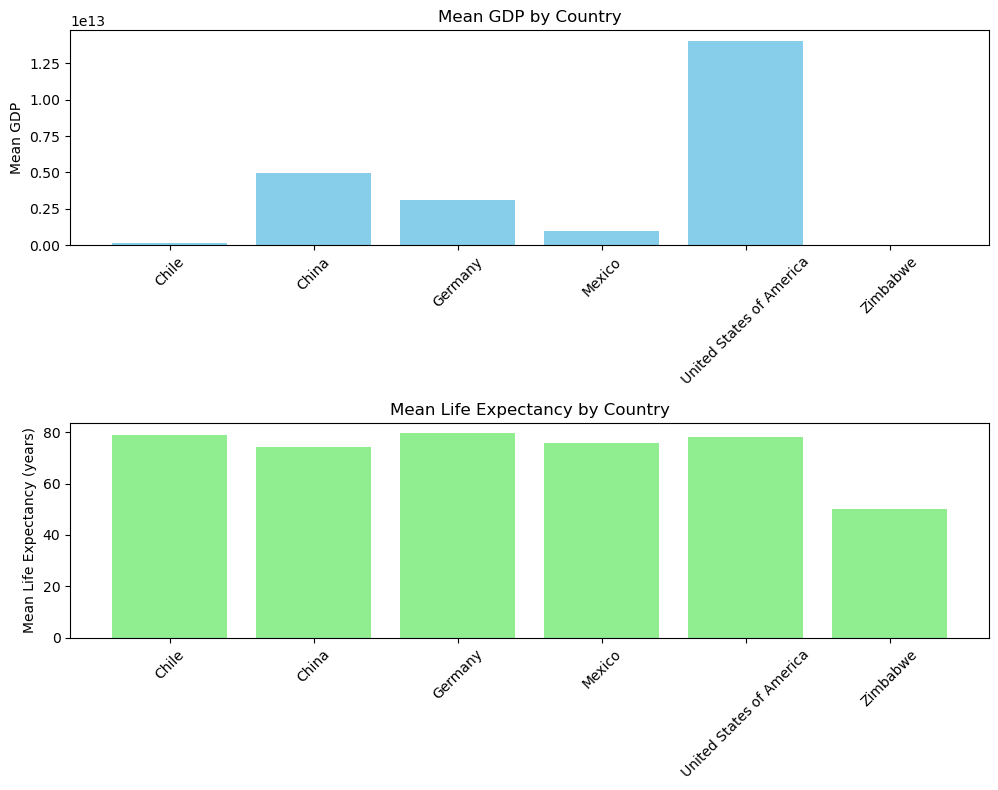

In [14]:
# Group data by country and calculate mean GDP and mean life expectancy
mean_gdp = df.groupby('Country')['GDP'].mean()
mean_life_expectancy = df.groupby('Country')['Life Expectancy'].mean()

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot bar chart for mean GDP
axs[0].bar(mean_gdp.index, mean_gdp.values, color='skyblue')
axs[0].set_title('Mean GDP by Country')
axs[0].set_ylabel('Mean GDP')

# Plot bar chart for mean life expectancy
axs[1].bar(mean_life_expectancy.index, mean_life_expectancy.values, color='lightgreen')
axs[1].set_title('Mean Life Expectancy by Country')
axs[1].set_ylabel('Mean Life Expectancy (years)')

# Rotate x-axis labels for better readability
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


#### Analysis
- For the average GDP by Country it seems that the `US` has a **much higher value** compared to the rest of the countries. In this bar plot, `Zimbabwe` is **not even visible** where `Chil`e is just **barely seen**. In comparison the `USA` has a **huge GDP** compared to the rest. `China`, `Germany` and `Mexico` seem to be **relatively close** in figure.
- On the  plot that represents Life Expectancy all of the countries have values around **75-80 years old**, except of `Zimbabwe`. This probably explains the left-skew in the distribution from before.

### How does life expectancy and GDP vary across different countries and years?

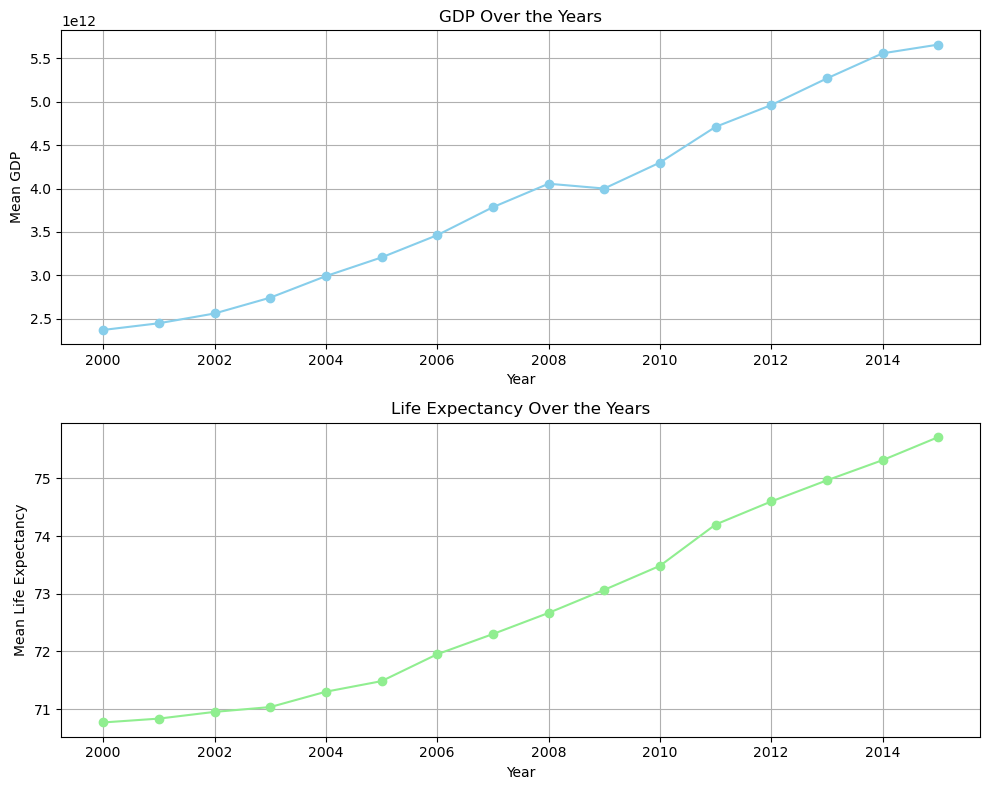

In [16]:
# Group data by year and calculate mean GDP and mean life expectancy
mean_gdp_by_year = df.groupby('Year')['GDP'].mean()
mean_life_expectancy_by_year = df.groupby('Year')['Life Expectancy'].mean()

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot line chart for mean GDP
axs[0].plot(mean_gdp_by_year.index, mean_gdp_by_year.values, marker='o', linestyle='-', color='skyblue')
axs[0].set_title('GDP Over the Years')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Mean GDP')
axs[0].grid(True)
axs[0].tick_params(axis='x')

# Plot line chart for mean life expectancy
axs[1].plot(mean_life_expectancy_by_year.index, mean_life_expectancy_by_year.values, marker='o', linestyle='-', color='lightgreen')
axs[1].set_title('Life Expectancy Over the Years')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Mean Life Expectancy')
axs[1].grid(True)
axs[1].tick_params(axis='x')

# Adjust layout
plt.tight_layout()
plt.show()

#### Analysis

- Throughout the years, there was a **gradual growth** in the `average GDP` among the presented countries. However, in the year `2009`, the GDP experienced a **slight decrease** compared to the previous year.
- he second graph illustrates a consistent increase in average `Life Expectancy` over the years.

### Has GDP increased over time in the six nations?

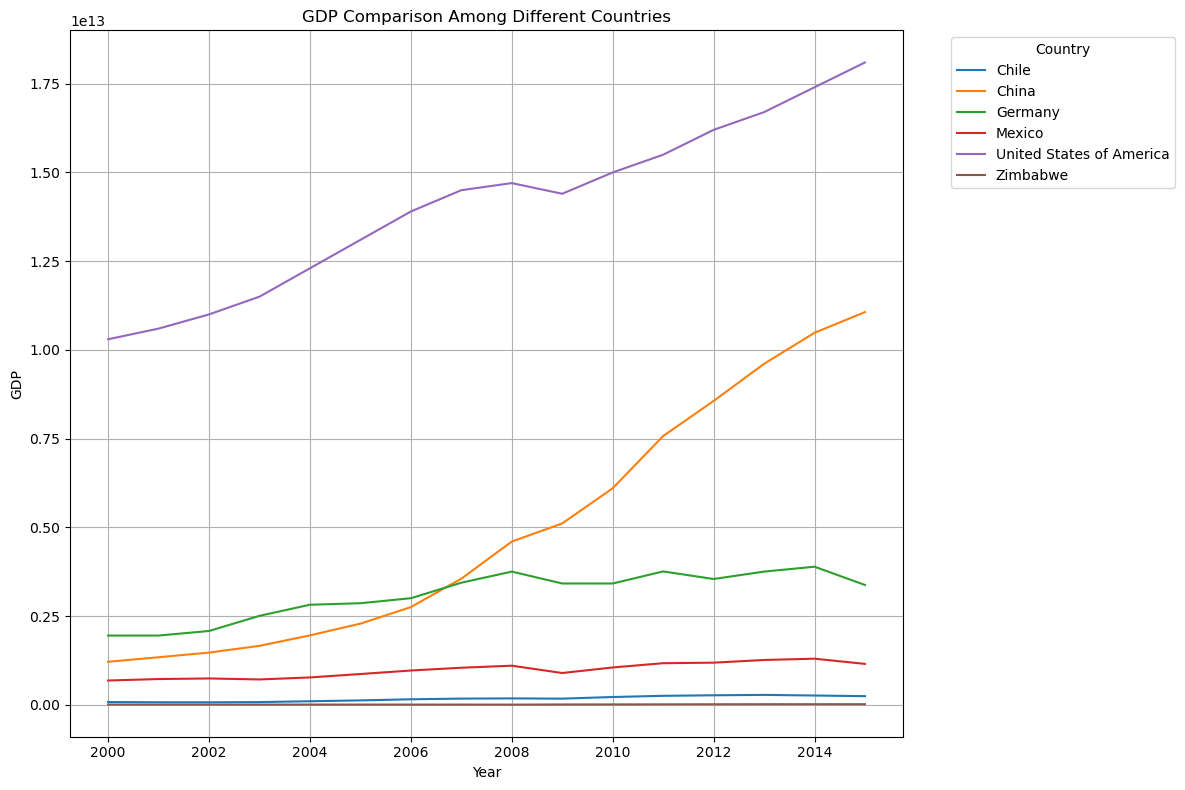

In [17]:
# Get unique country names
countries = df['Country'].unique()

# Create a line chart for GDP comparison among different countries
plt.figure(figsize=(12, 8))
for country in countries:
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP'], label=country)

plt.title('GDP Comparison Among Different Countries')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Analysis
The `US` and `China` have seen **substantial gains** between 2000-2015. `China` went from less than a quarter trillion dollars to one trillion dollars in the time span. **The rest of the countries did not seem to have much increase in GDP**. 
However, let's break down the graph into several subplots representing GPD tendency over the years for each contry.

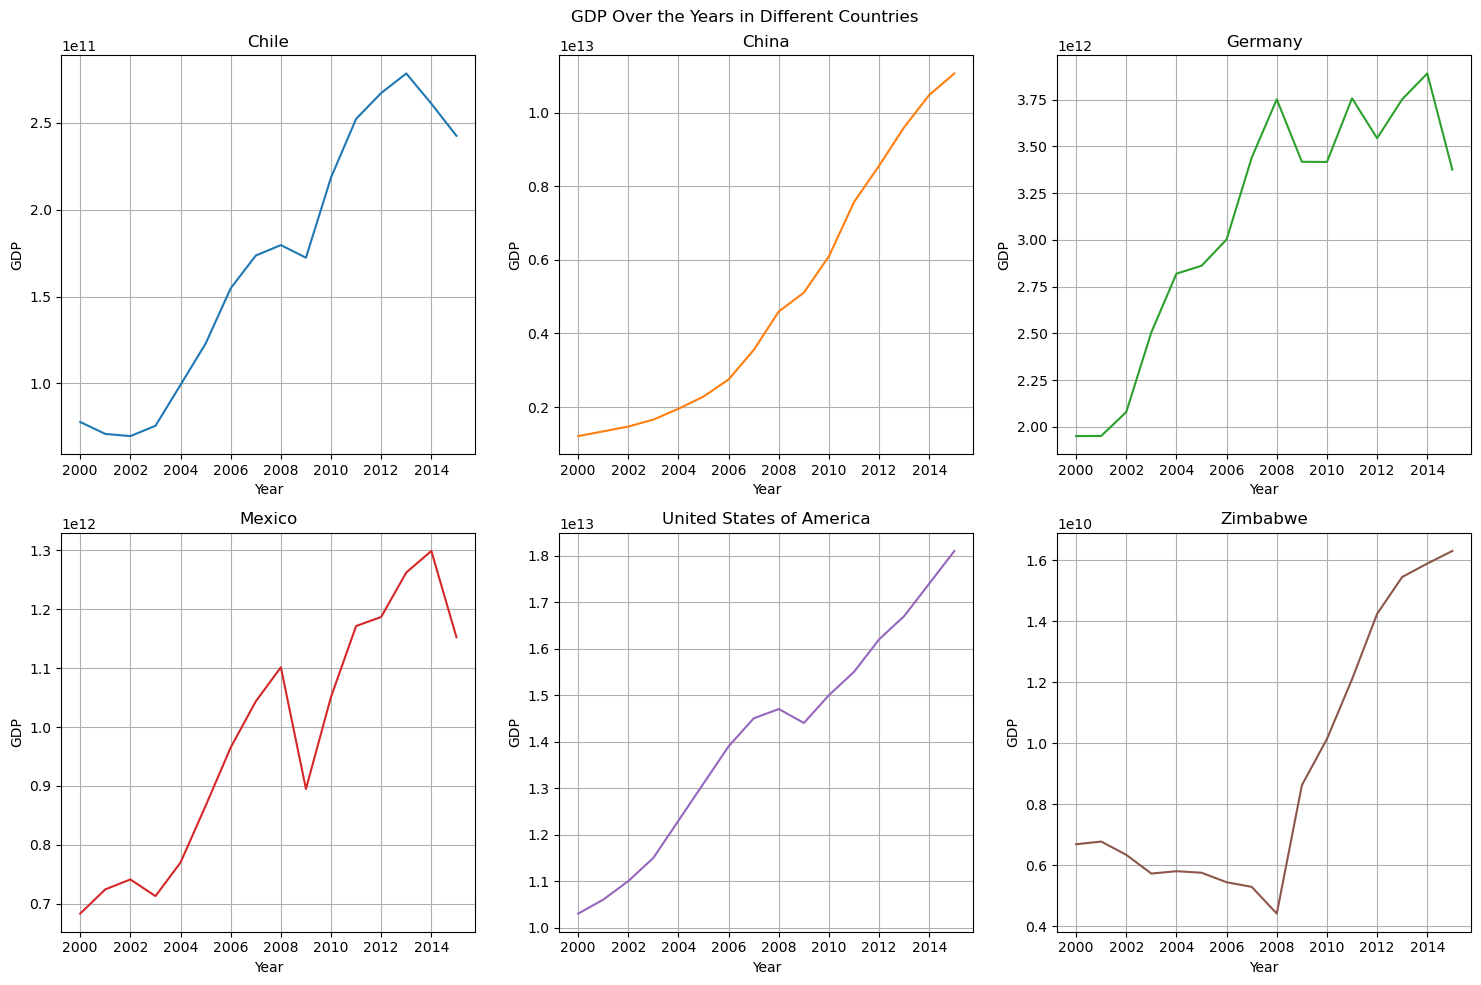

In [24]:
# Calculate the number of rows and columns for subplots
num_countries = len(countries)
num_cols = 3
num_rows = (num_countries + num_cols - 1) // num_cols

# Create subplots for GDP comparison among different countries
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axs = axs.flatten()
plt.suptitle('GDP Over the Years in Different Countries')

# Define colors for each country
colors = plt.cm.tab10.colors  

for i, (country, color) in enumerate(zip(countries, colors)):
    country_data = df[df['Country'] == country]
    ax = axs[i]
    ax.plot(country_data['Year'], country_data['GDP'], color = color)
    ax.set_title(f'{country}')
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP')
    ax.grid(True)

# Hide empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()
plt.show()

#### Analysis
In the individual plots, each country has their own y axis, which makes it easier to compare the shape of their GDP over the years without the same scale. 
So now we can be sure that **all of the countries did experience significant growth of GDP from the year 2000**.

### Has life expectancy increased over time in the six nations?

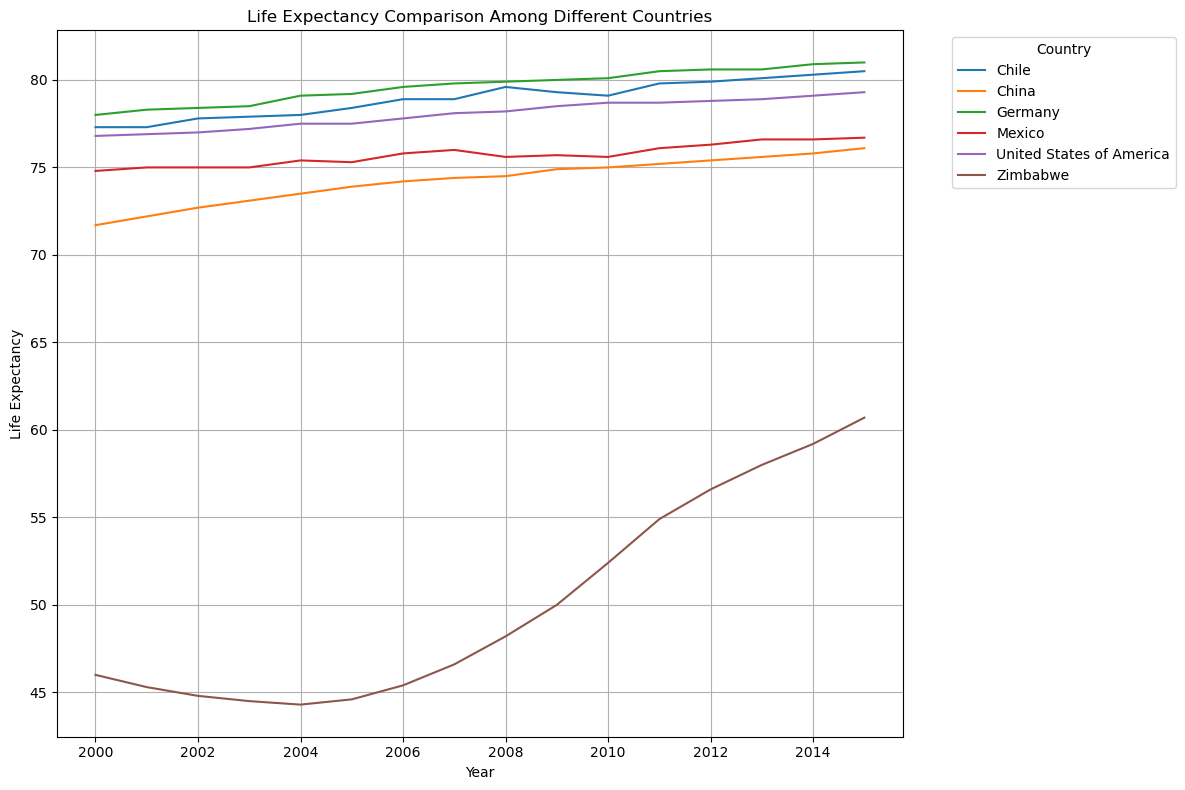

In [25]:
# Create a line chart for GDP comparison among different countries
plt.figure(figsize=(12, 8))
for country in countries:
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Life Expectancy'], label=country)

plt.title('Life Expectancy Comparison Among Different Countries')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Analysis
The chart shows that every country has been **increasing their Life Expectancy**, but `Zimbabwe` has seen **the greatest** increase after a bit of a dip around 2004.

Let's see more presicely how the Life Expectancy has been changed throughout the years for each countly in particular.

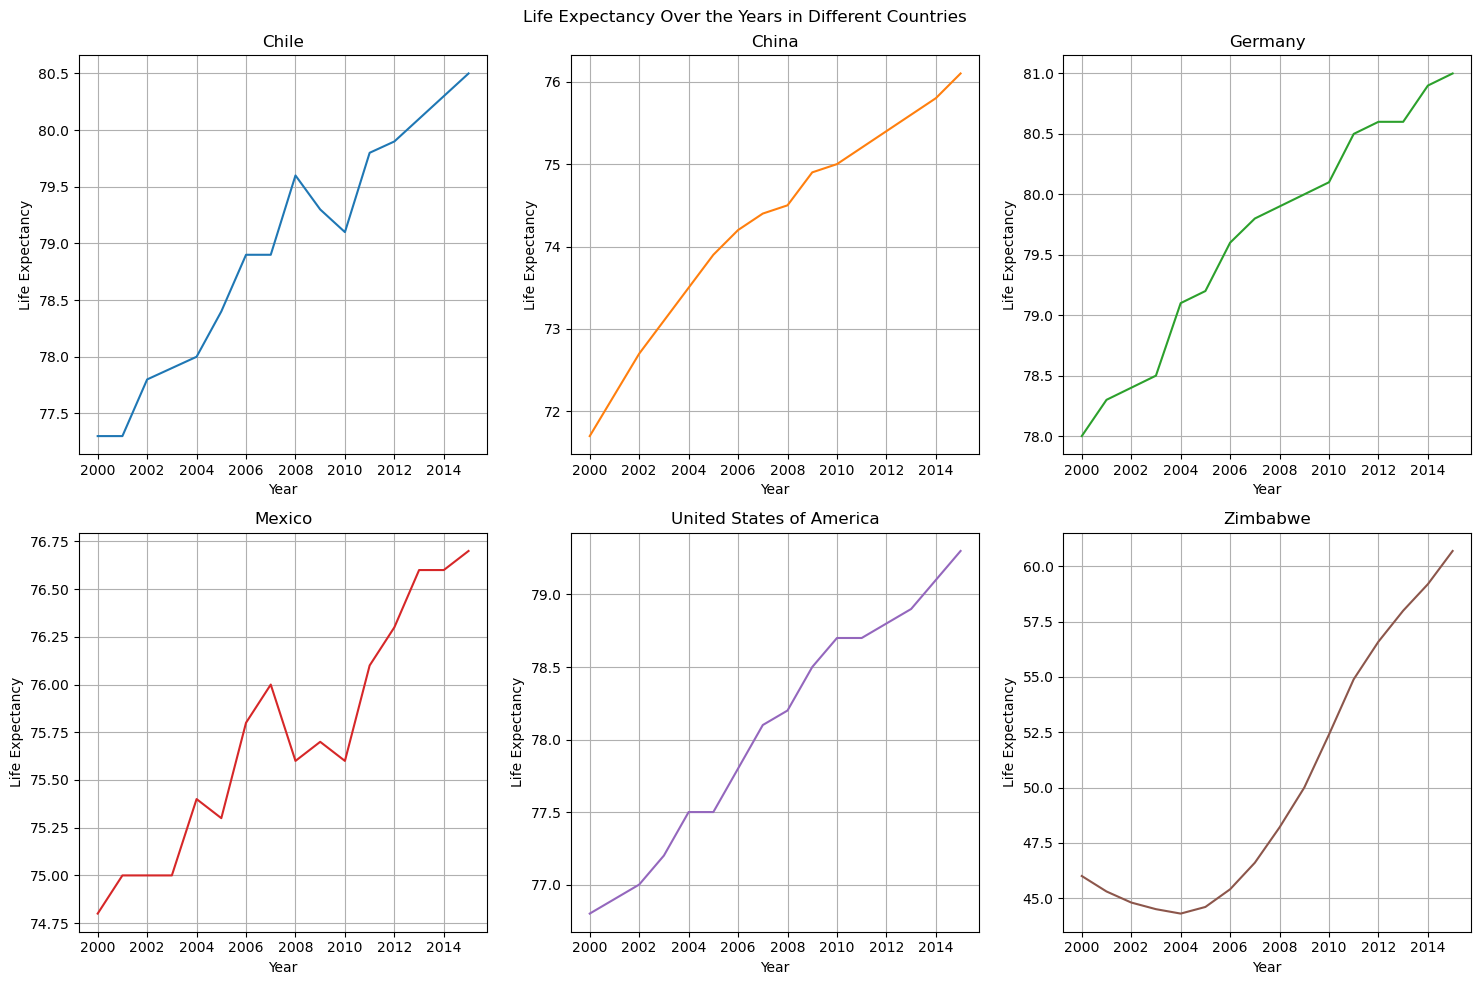

In [27]:
# Calculate the number of rows and columns for subplots
num_countries = len(countries)
num_cols = 3
num_rows = (num_countries + num_cols - 1) // num_cols

# Create subplots for life expectancy comparison among different countries
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axs = axs.flatten()
plt.suptitle('Life Expectancy Over the Years in Different Countries')

# Define colors for each country
colors = plt.cm.tab10.colors  

for i, (country, color) in enumerate(zip(countries, colors)):
    country_data = df[df['Country'] == country]
    ax = axs[i]
    ax.plot(country_data['Year'], country_data['Life Expectancy'], color = color)
    ax.set_title(f'{country}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Life Expectancy')
    ax.grid(True)

# Hide empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()
plt.show()


#### Analysis

The individual plots demonstrate that **all countries experienced growth from the year 2000 onwards**. Upon comparing the y-axis of each plot, it is evident that the Life Expectancy in `Zimbabwe` is rising from less than 45 years to more than 60 years which is **the most significant increase** overall.

### Is there a correlation between GDP and life expectancy of a country?

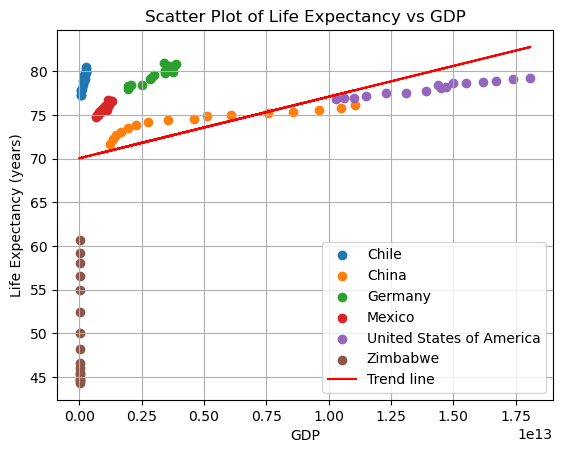

In [30]:
# Define colors for each country
colors = plt.cm.tab10.colors  
# Plot scatter plot
for i, country in enumerate(df['Country'].unique()):
    country_data = df[df['Country'] == country]
    plt.scatter(country_data['GDP'], country_data['Life Expectancy'], label=country, color=colors[i])

plt.title('Scatter Plot of Life Expectancy vs GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy (years)')
plt.grid(True)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['GDP'], df['Life Expectancy'])

# Plot trend line
plt.plot(df['GDP'], intercept + slope * df['GDP'], color='red', label='Trend line')
plt.legend()

plt.show()


#### Analysis
There is a **moderately positive linear relationship** between life expectancy and GDP.

### What is the strength and direction of the correlation between GDP and life expectancy for each country? Are there significant differences in the correlation coefficient among different countries?

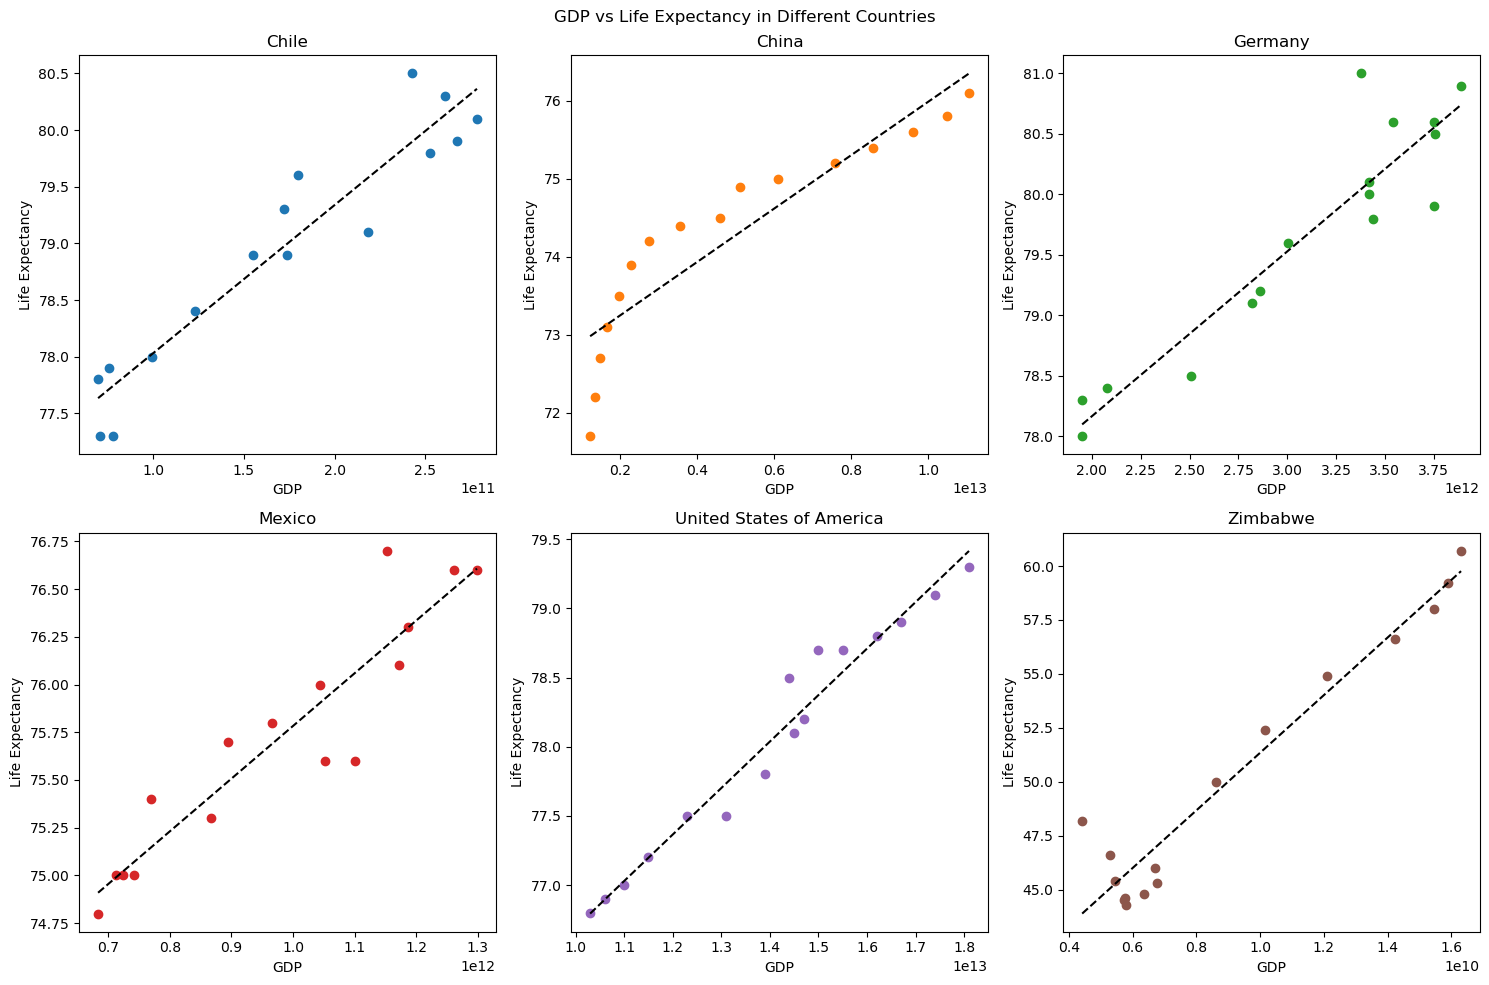

In [15]:
# Get unique country names
countries = df['Country'].unique()

# Calculate the number of rows and columns for subplots
num_countries = len(countries)
num_cols = 3
num_rows = (num_countries + num_cols - 1) // num_cols

# Define colors for each country
colors = plt.cm.tab10.colors  

# Create subplots  
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axs = axs.flatten()
plt.suptitle('GDP vs Life Expectancy in Different Countries')
# Iterate over countries and plot scatter plots with different colors
for i, (country, color) in enumerate(zip(countries, colors)):
    country_data = df[df['Country'] == country]
    axs[i].scatter(country_data['GDP'], country_data['Life Expectancy'], color=color)
    axs[i].set_title(f'{country}')
    axs[i].set_xlabel('GDP')
    axs[i].set_ylabel('Life Expectancy')
    
    # Perform linear regression
    slope, intercept, _, _, _ = linregress(country_data['GDP'], country_data['Life Expectancy'])
    
    # Plot trend line
    x_values = np.linspace(country_data['GDP'].min(), country_data['GDP'].max(), 100)
    y_values = slope * x_values + intercept
    axs[i].plot(x_values, y_values, color='black', linestyle='--')

# Hide empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [37]:
# Iterate over countries and plot scatter plots with different colors
for i, (country, color) in enumerate(zip(countries, colors)):
    country_data = df[df['Country'] == country]
    # Calculate Pearson correlation coefficient and p-value
    correlation_coefficient, p_value = pearsonr(country_data['GDP'], country_data['Life Expectancy'])
    
    # Print correlation result
    print(f'{country}:')
    print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
    print(f'P-value: {p_value}')
    if p_value < 0.05:  # Assuming a significance level of 0.05
        print("The correlation coefficient is statistically significant.")
        print("Reject the null hypothesis: There is a significant correlation between life expectancy and GDP.")
    else:
        print("The correlation coefficient is not statistically significant.")
        print("Fail to reject the null hypothesis: There is no significant correlation between life expectancy and GDP.")
    print()

Chile:
Pearson Correlation Coefficient: 0.9498766659254416
P-value: 1.8659139746585315e-08
The correlation coefficient is statistically significant.
Reject the null hypothesis: There is a significant correlation between life expectancy and GDP.

China:
Pearson Correlation Coefficient: 0.9085255408648358
P-value: 1.125098572070064e-06
The correlation coefficient is statistically significant.
Reject the null hypothesis: There is a significant correlation between life expectancy and GDP.

Germany:
Pearson Correlation Coefficient: 0.9326988982561268
P-value: 1.4018815534045922e-07
The correlation coefficient is statistically significant.
Reject the null hypothesis: There is a significant correlation between life expectancy and GDP.

Mexico:
Pearson Correlation Coefficient: 0.9322377167847082
P-value: 1.4686960248304982e-07
The correlation coefficient is statistically significant.
Reject the null hypothesis: There is a significant correlation between life expectancy and GDP.

United States 

#### Analysis
- Looking at the individual countries, most of the countries have **linear relationships between GDP and life expectancy**. `China` on the other hand has a **slightly exponential curve**. In general though one can see an increase in GDP and life expectancy, exhibiting a positive correlation.
- Correlation coefficients ranging from approximately `0.91` to `0.98` suggest **a very strong positive correlation between GDP and life expectancy** across the countries. This indicates that as GDP increases, life expectancy tends to increase as well, and vice versa, with a high degree of correlation observed.
- The strongest correlation observed is in `the United States of America` (correlation coefficient: 0.98), while the weakest, though still strong, is in `China` (approximately 0.91).

## Conclusion 

1. **Distribution Analysis**:
   - The data exhibits a ***right-skewed distribution for GDP*** and a ***left-skewed distribution for life expectancy***.
     
2. **Variation Across GDP Levels**:
   - The middle 50% of the life expactancy data (interquartile range) is between `74.5` years and `78.9` years. 
   - The ***interquartile range for life expectancy is narrower in high GDP countries***, indicating less variability compared to low GDP countries.
   - Additionally, life expectancy values `below 63 years` are predominantly found in ***low GDP countries***.
     
3. **Mean GDP and Life Expectancy Across Countries**:
   - `The United States` stands out with ***significantly higher GDP*** compared to other countries, while `Zimbabwe` exhibits relatively ***lower life expectancy*** compared to the rest.
     
4. **Trends Over Time**:
   - Over the years, there has been a ***consistent growth in average GDP*** among the presented countries, with a slight decrease observed in 2009.
   - Similarly, average ***life expectancy has shown a consistent increase over time***, indicating overall improvements in health outcomes.
   
5. **Country-Specific Trends**:
   - While most countries exhibit linear relationships between GDP and life expectancy, `China` demonstrates a slightly exponential curve.
   - Notably, `Zimbabwe` has experienced a significant increase in life expectancy after a temporary dip around 2004.

6. **Correlation Between GDP and Life Expectancy**:
   - ***Strong positive correlations between GDP and life expectancy are observed across all countries***, with correlation coefficients ranging from approximately `0.91` to `0.98`.
   - This suggests that as GDP increases, life expectancy tends to increase as well, underscoring the significant influence of economic prosperity on health outcomes.
    - The strongest correlation is observed in `the United States` (correlation coefficient: 0.98), followed by other countries.
    - While correlation coefficients are consistently strong across countries, minor variations exist, with `China` exhibiting a slightly weaker correlation compared to other nations.

In conclusion, the analysis underscores the critical interplay between economic development and health outcomes, with strong correlations observed between GDP and life expectancy across various countries. These insights can inform policy decisions aimed at promoting economic growth and improving public health on a global scale.